# Predicting Insurance Costs

The aim of the project is to figure out how different characteristics relate to the total medical cost.

In [331]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## About the dataset

In [332]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The [dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance/data) contains 6 features and 1 target column. There are 1337 rows of data in the dataset.

### Description of the columns

**age**: age of primary beneficiary

**sex**: insurance contractor gender, female, male|

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: Number of children covered by health insurance / Number of dependents

**smoker**: Smoking

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges**: Individual medical costs billed by health insurance

## Feature selection for the Linear Regression Modeling

As there are categorical columns, let's first get some dummies for these columns.

In [333]:
insurance_with_dummies = pd.get_dummies(insurance, columns=["sex", "smoker", "region"])
insurance_with_dummies.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


As the next step, let's explore how attributes from the dataset correlate with medical charges. 

In [334]:
insurance_with_dummies.corr()["charges"].sort_values()

smoker_no          -0.787251
sex_female         -0.057292
region_southwest   -0.043210
region_northwest   -0.039905
region_northeast    0.006349
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
charges             1.000000
Name: charges, dtype: float64

There is a strong negative correlation (-0.787251) between non-smoking people and charges and a strong positive correlation (0.787251) between smoking people and charges.

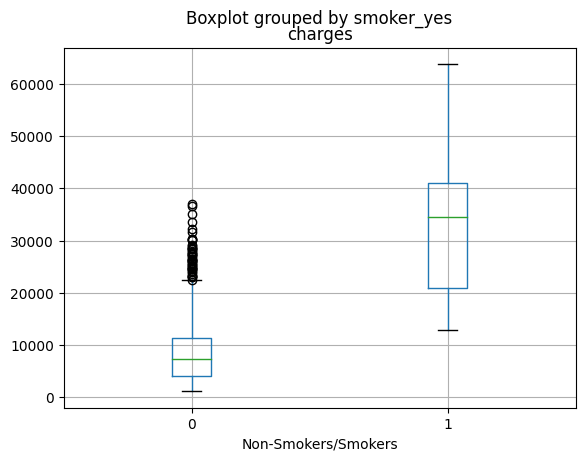

In [335]:
%matplotlib inline
import matplotlib.pyplot as plt
insurance_with_dummies.boxplot("charges", by="smoker_yes")
plt.xlabel("Non-Smokers/Smokers")
plt.show()

We plot above shows that charges are higher for smokers than non-smokers. The `smoker` parameter will be used as a predictor for the predictor model.

## Model training

Next step is to split the data into a training and a test sets.

In [336]:
y = insurance_with_dummies["charges"]
X = insurance_with_dummies[["smoker_yes"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [337]:
model = LinearRegression().fit(X_train, y_train)

The intercept of the model shows the average outcome (charges) for non-smokers.

In [338]:
model.intercept_

8578.322547999996

The coefficient of the model shows the change in the average outcome (charges) if the person was a non-smoker instead of a smoker.

In [339]:
model.coef_

array([23188.68587068])

### The coefficient of determination for train data

In [340]:
train_predictions = model.predict(X_train)
r2_score(y_train, train_predictions)

0.6084975246707405

### The mean squared error (MSE) based on the training set

In [341]:
mean_squared_error(y_train, train_predictions)

56506970.26006487

We can take its square root for an idea of the same dimension as the outcome:

In [342]:
mean_squared_error(y_train, train_predictions, squared=False)

7517.1118296899685

## Model performance on the test data

The training error is almost always overly optimistic, so we shouldn't use it as the final judge of the model's predictive ability. It's time to see how the model performs on the test data, which represents a set of new observations that it hasn't been trained on. 

### The coefficient of determination for test data

In [343]:
test_predictions = model.predict(X_test)
r2_score(y_test, test_predictions)

0.6602486589056528

### The mean squared error (MSE) based on the test set

In [344]:
mean_squared_error(y_test, test_predictions)

52745964.72752626

We can take its square root for an idea of the same dimension as the outcome:

In [345]:
mean_squared_error(y_test, test_predictions, squared=False)

7262.641718240427